# Описание

Наш Заказчик — IT-компания, последние 15 лет успешно занимавшаяся разработкой и консалтингом на российском рынке. В декабре 2021 года компания открыла новое направление — развитие образовательных продуктов для IT-специалистов — онлайн-курсов повышения квалификации и профессиональной переподготовки. На рынок она планирует выпускать образовательные программы, которые должны: 

•	готовить кадры в соответствии с требованиями современного рынка труда;

•	стоимость должна быть конкурентной, но также соответствовать покупательной способности людей (она сейчас снижается);

•	программы должны собираться быстро, чтобы гибко реагировать на спрос, и Компания могла занять свою нишу на рынке образовательных услуг.


Задачей было выгрузить все вакансии по всем специализациям и подспециализациям, размещённые на агрегаторе на дату выгрузки (26 мая и 16 июня) по всем регионам РФ.
**region roles (26.05.22).xlsx**

Обязательные поля:

•	название вакансии (name)

•	описание вакансии (description)

•	регион вакансии (area)

•	дата размещения вакансии (published_at)

•	ключевые навыки (key_skills)

•	специализация (specialization.profarea_name)

•	подспециализация (specialization)


# Разведочный анализ данных (EDA)

## 1.Загрузка датафрейма

In [ ]:
!gdown --id 1DpgM5IXs_3YH-tu3TeIaHVsi8isrHljc

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DpgM5IXs_3YH-tu3TeIaHVsi8isrHljc
To: /content/region roles (26.05.22).xlsx
100% 84.4M/84.4M [00:01<00:00, 75.1MB/s]


In [ ]:
import pandas as pd
df = pd.read_excel('region roles (26.05.22).xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

Проверка дубликатов по всему Датафрейму

In [ ]:
df.duplicated().sum()

0

In [ ]:
import json

In [ ]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['specializations_json'] = df['specializations'].apply(text_to_json)

def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['profarea_name'])
    return out
  except:
    return []
df['specializations_list'] = df['specializations_json'].apply(get_values)

In [ ]:
#фильтрация данных по категории Информационные технологии по всему df
def is_it(specializations_list):
  return 'Информационные технологии, интернет, телеком' in specializations_list
filter = df['specializations_list'].apply(is_it)
df=df[filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 0 to 69655
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50390 non-null  int64  
 1   id                        50390 non-null  int64  
 2   premium                   50390 non-null  bool   
 3   name                      50390 non-null  object 
 4   department                4488 non-null   object 
 5   has_test                  50390 non-null  bool   
 6   response_letter_required  50390 non-null  bool   
 7   area                      50390 non-null  object 
 8   salary                    22724 non-null  object 
 9   type                      50390 non-null  object 
 10  address                   26912 non-null  object 
 11  response_url              0 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              50390 non-null  object 
 14  create

Преобразование ключевых навыков в список

In [ ]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['key_skills_json'] = df['key_skills'].apply(text_to_json)

# Сделаем список ключевых навыков.

def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df['key_skills_list'] = df['key_skills_json'].apply(get_values)

## 2.Преобразование числовых данных Salary

### 2.1 Преобразование фрагментов из списка salary_from, salary_to, currency, gross

In [ ]:
# преобразование колонны salary в json
df['salary_json'] = df['salary'].fillna('{}').apply(eval)

In [ ]:
# salary from
def get_values(json):
  try:
    return json['from']
  except:
    return None
df['salary_from'] = df['salary_json'].apply(get_values)
# salary to
def get_values(json):
  try:
    return json['to']
  except:
    return None
df['salary_to'] = df['salary_json'].apply(get_values)
# salary currency
def get_values(json):
  try:
    return json['currency']
  except:
    return None
df['salary_currency'] = df['salary_json'].apply(get_values)
# salary gross
def get_values(json):
  try:
    return json['gross']
  except:
    return None
df['salary_gross'] = df['salary_json'].apply(get_values)

### 2.2 Конвертирование Salary с учетом НДФЛ

In [ ]:
#цены на валютном рынке
rates = {'RUR': 1, 'USD': 60, 'EUR': 60, 'KZT': 0.13}

In [ ]:
#формула для замены показателей True and False
n_df = df[['salary_from', 'salary_to', 'salary_currency', 'salary_gross']]
s = n_df.replace({'salary_gross':{True:0.87, False:1}})

In [ ]:
#конвертация с учетом gross
df['convertred_salary_from'] = df['salary_currency'].map(rates) * df['salary_from'] * s['salary_gross']
df['convertred_salary_to'] = df['salary_currency'].map(rates) * df['salary_to'] * s['salary_gross']

In [ ]:
#результат вывода в общей таблице после конвертации
df[['convertred_salary_from', 'convertred_salary_to','salary_currency','salary_gross']]

,convertred_salary_from,convertred_salary_to,salary_currency,salary_gross
0,NaN,NaN,None,None
1,21750.0,43500.0,RUR,True
2,NaN,NaN,None,None
3,22620.0,NaN,RUR,True
4,20000.0,20000.0,RUR,False
...,...,...,...,...
69651,NaN,NaN,None,None
69652,130000.0,NaN,RUR,False
69653,50000.0,NaN,RUR,False
69654,85000.0,NaN,RUR,False


### 2.3 Неграфический анализ числовых данных

In [ ]:
# Создание переменной с Salary
salary_from_stat = df['convertred_salary_from']

In [ ]:
# Расчет минимального, максимального, среднего и медианного значения Salary_form(по айти специализациям)
max_value = salary_from_stat.max()
min_value = salary_from_stat.min()
mean_value = salary_from_stat.mean()
median_value = salary_from_stat.median()
print('Максимальная ЗП от: ', max_value)
print('Минимальная ЗП от: ', min_value)
print('Средняя ЗП от: ', mean_value)
print('Медиана ЗП от: ', median_value)

Максимальная ЗП от:  870000.0
Минимальная ЗП от:  25.0
Средняя ЗП от:  79753.71962495672
Медиана ЗП от:  60000.0


In [ ]:
# Расчет 10-го и 25-го процентилей Series
percentile_10_value = salary_from_stat.quantile(0.10)
percentile_25_value = salary_from_stat.quantile(0.25)
print('10-й процентиль Salary_from: ', percentile_10_value)
print('25-й процентиль Salary_from: ', percentile_25_value)

10-й процентиль Salary_from:  24795.0
25-й процентиль Salary_from:  35000.0


In [ ]:
# Для расчета всех основных статистических показателей сразу
salary_from_stat.describe().round()

count     20211.0
mean      79754.0
std       62348.0
min          25.0
25%       35000.0
50%       60000.0
75%      100000.0
max      870000.0
Name: convertred_salary_from, dtype: float64

### 2.4 Графический анализ данных

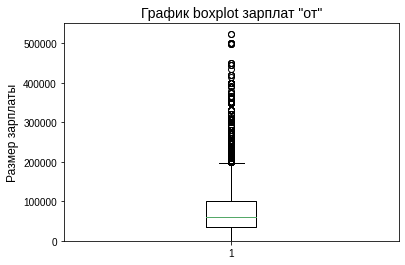

In [ ]:
import matplotlib.pyplot as plt

salary_from_stat_na = salary_from_stat.dropna()
plt.axis(ymin=0, ymax=550000)
plt.boxplot(salary_from_stat_na)
plt.title('График boxplot зарплат "от"', fontsize=14)
plt.ylabel('Размер зарплаты', fontsize=12)
plt.style.use('seaborn')
plt.show()

Выводы:Большие показания зарплат по вакансиям с IT в дипозоне от 200000 до 400000. Основные данные -это наш бокс на графике, в нем зарплаты варьируется от 35000 до 100000.

## 3.Анализ категориальных данных в отфильтр. датасете



### 3.1 Неграфический анализ

Анализ вакансии

Переработка вакансии

In [ ]:
def replace_duplicates_name(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['name'] = df['name'].replace(wrong_value, correct_value) 

In [ ]:
def search_for_similar_name(str):
  district = []
  for name in df['name']:
    if str.lower() in name.lower():
      district.append(name)
  return district

In [ ]:
replace_duplicates_name('Программист 1C', 'Программист 1С')
replace_duplicates_name(search_for_similar_name('службы поддержки с техническими знаниями'), 'Специалист службы поддержки с техническими знаниями.')
replace_duplicates_name(search_for_similar_name('поддержки'), 'Специалист службы поддержки.')
replace_duplicates_name(search_for_similar_name('поддержки'), 'Специалист службы поддержки.')
replace_duplicates_name(search_for_similar_name('Ведущий специалист по информационным технологиям'), 'Ведущий специалист по информационным технологиям.')
replace_duplicates_name(search_for_similar_name('1с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1c'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 c'), 'Программист 1С')

In [ ]:
df['name'].describe()

count              50390
unique             21316
top       Программист 1С
freq                4815
Name: name, dtype: object

Вывод: больше всего вакансии Системный администратор

In [ ]:
# топ 10 вакансии
top_name = df['name'].value_counts()[:10]
top_name

Программист 1С                  4815
Специалист службы поддержки.    4195
Системный администратор         1657
Системный аналитик               466
Аналитик                         343
Инженер-программист              328
Графический дизайнер             314
Бизнес-аналитик                  268
Дизайнер                         252
Технический писатель             214
Name: name, dtype: int64

Вывод: Больше всего вакансии связанные с Програмированием 1С после обработки

Анализ ключевых навыков

In [ ]:
key_it_df = df[['key_skills_list','name']]
key_it = key_it_df.explode('key_skills_list').dropna() 

top_it_key = key_it['key_skills_list'].value_counts()
top_it_key = top_it_key[:10]

In [ ]:
top_it_key

SQL                     6379
Linux                   4931
Git                     4581
Английский язык         3967
Работа в команде        3474
Управление проектами    3457
Python                  3242
JavaScript              2769
1С программирование     2591
PostgreSQL              2565
Name: key_skills_list, dtype: int64

Больше всего требований по ключевым навыкам SQL больше 6т.

### 3.2 Графический анализ категориальных данных

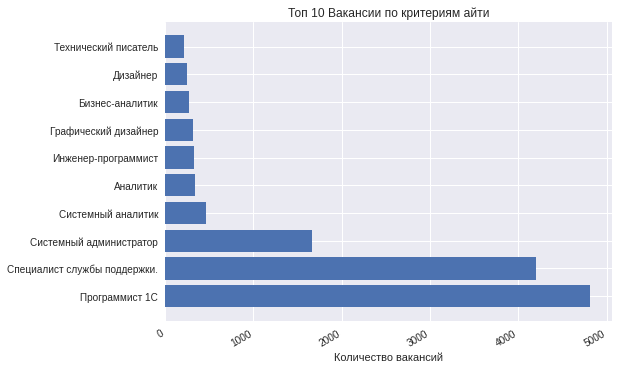

In [ ]:
import matplotlib.pyplot as plt

plt.xticks(rotation=30, ha='right')
plt.title('Топ 10 Вакансии по критериям айти')
plt.style.use('seaborn')
plt.xlabel('Количество вакансий')
params = {
    'axes.titlesize':11,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_name.index, top_name.values)
plt.show()

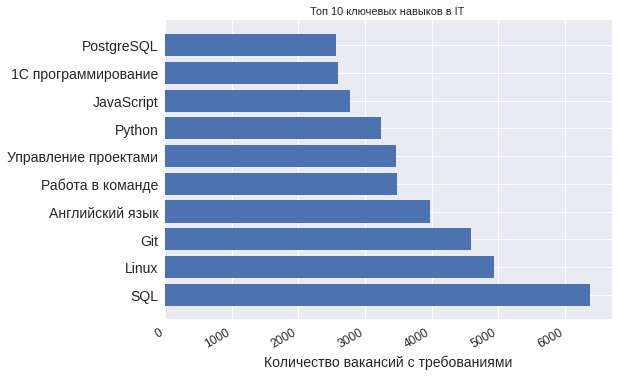

In [ ]:
import matplotlib.pyplot as plt

plt.xticks(rotation=30, ha='right')
plt.title('Топ 10 ключевых навыков в IT ')
plt.style.use('seaborn')
plt.xlabel('Количество вакансий с требованиями')
params = {
    'axes.titlesize':10,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_it_key.index, top_it_key.values)
plt.show()

## 4.Взаимосвязь колоннок

### 4.1 Анализ взаимосвязи категориальной и числовой переменных 

In [ ]:
top_it_key_list = ['SQL',
                   'Linux',
                   'Git',
                   'Английский язык',
                   'Работа в команде',
                   'Управление проектами',
                   'Python','JavaScript',
                   '1С программирование',
                   'PostgreSQL']
filter_key = key_it['key_skills_list'].isin(top_it_key_list)

filter_df_key = key_it[filter_key]

In [ ]:
top_name_list = ['Программист 1С',
             'Специалист службы поддержки.',
             'Системный администратор',
             'Системный аналитик',
             'Аналитик',
             'Инженер-программист',
             'Графический дизайнер',
             'Бизнес-аналитик',
             'Дизайнер',
             'Технический писатель']

filter = df['name'].isin(top_name_list)

filter_df = df[filter]

In [ ]:
filter_df.groupby('name')['convertred_salary_from'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Аналитик,138.0,56379.734348,37089.575511,30.00,35000.000,45000.0,60000.0,200100.0
Бизнес-аналитик,69.0,84878.768116,35165.060789,30000.00,53000.000,80000.0,110000.0,200000.0
Графический дизайнер,217.0,44780.815668,22286.061556,10000.00,30000.000,40000.0,50000.0,150000.0
Дизайнер,168.0,41999.345238,19565.196185,15000.00,30000.000,35000.0,50000.0,170000.0
Инженер-программист,219.0,49266.696575,26267.277870,10173.78,30225.000,40000.0,69600.0,150000.0
Программист 1С,2485.0,97048.737984,46817.444860,60.00,60000.000,95700.0,130000.0,304500.0
Системный администратор,1004.0,51581.470936,23450.834946,30.00,35000.000,47000.0,60900.0,180000.0
Системный аналитик,78.0,106606.192564,55576.227781,28971.00,67215.765,90000.0,150000.0,261000.0
Специалист службы поддержки.,2802.0,33388.603112,23925.219894,11310.00,13050.000,27000.0,40972.5,300000.0


In [ ]:
#взаимосвязь профессии и ЗП , показывает в каких профессиях какая медиана ЗП
filter_df.groupby('name')['convertred_salary_from'].median()

name
Аналитик                        45000.0
Бизнес-аналитик                 80000.0
Графический дизайнер            40000.0
Дизайнер                        35000.0
Инженер-программист             40000.0
Программист 1С                  95700.0
Системный администратор         47000.0
Системный аналитик              90000.0
Специалист службы поддержки.    27000.0
Технический писатель            60450.0
Name: convertred_salary_from, dtype: float64

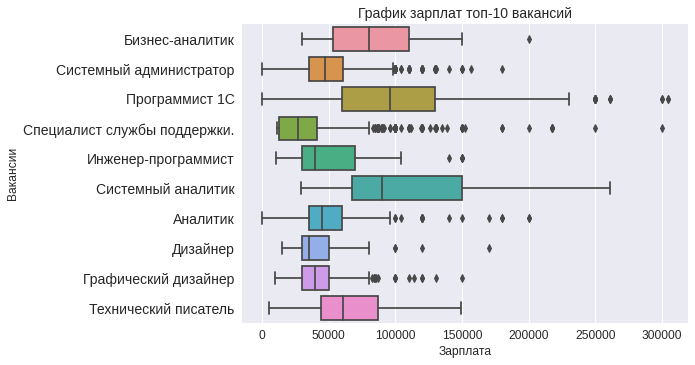

In [ ]:
import seaborn as sns

plt.title('График зарплат топ-10 вакансий', fontsize=14)
sns.boxplot(x='convertred_salary_from', y='name', data=filter_df)
plt.ylabel('Вакансии', fontsize=12)
plt.xlabel('Зарплата', fontsize=12)

plt.style.use('seaborn-muted')
plt.show()

### 4.2 Анализ взаимосвязи двух категориальных переменных

In [ ]:
part_df = filter_df[['key_skills_list', 'name']]
part_df = part_df.explode('key_skills_list').dropna()

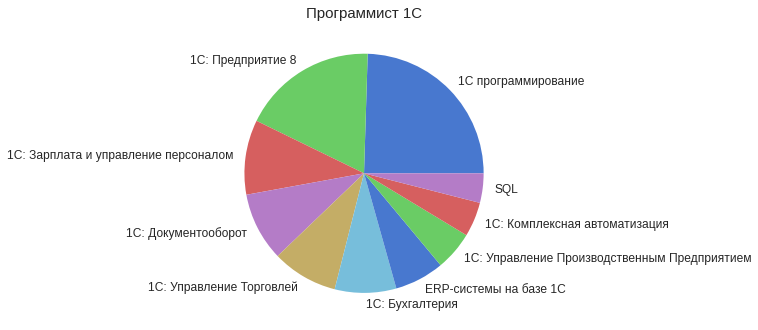

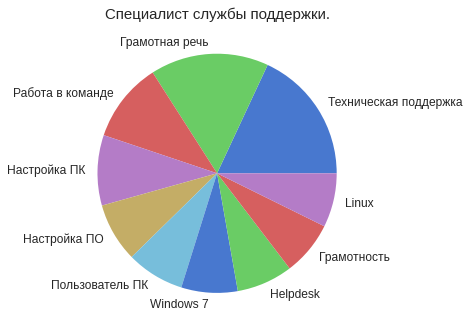

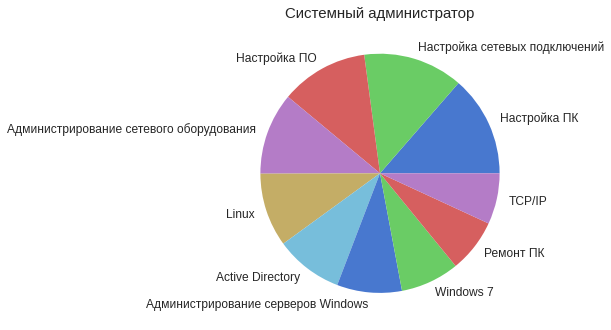

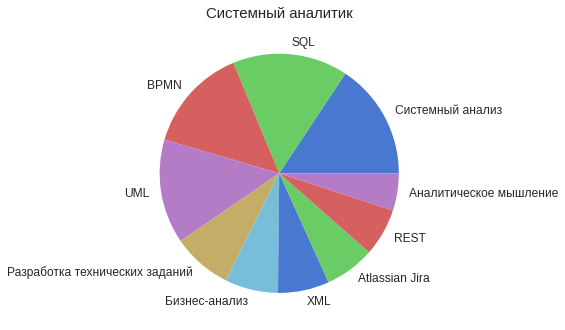

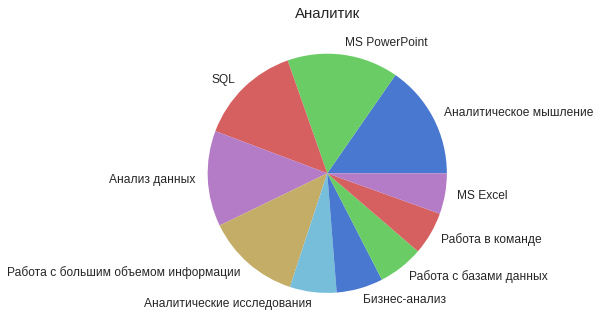

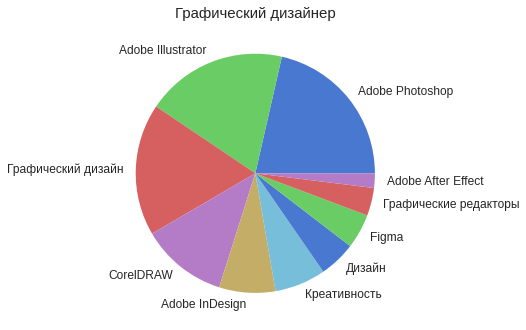

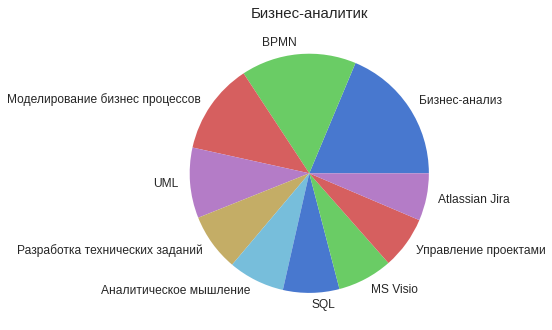

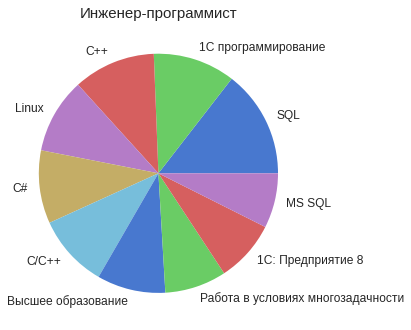

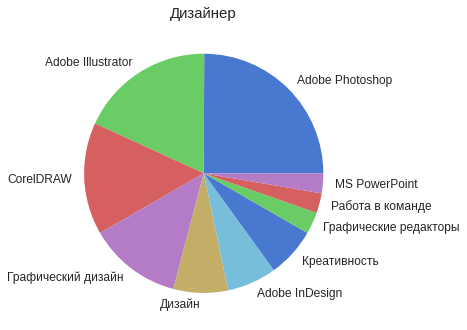

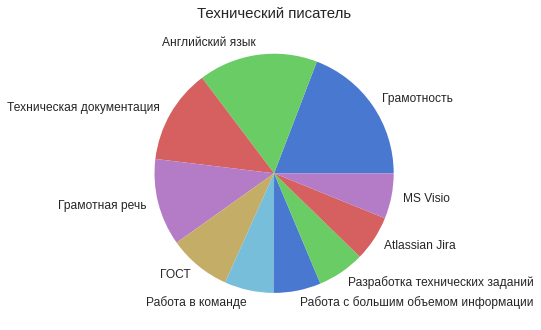

In [ ]:
spec_counts = part_df['name'].value_counts()[:10]
spec_counts

spec_types = spec_counts.index
spec_types

import matplotlib.pyplot as plt
for spec_type in spec_types:
  spec_df = part_df[part_df['name'] == spec_type]
  vacancy_counts = spec_df['key_skills_list'].value_counts()
  vacancy_counts = vacancy_counts[:10]
  plt.title(spec_type, fontsize=15)
  plt.pie(vacancy_counts.values, labels =vacancy_counts.index)
  plt.show()

Вывод: по данным диаграммам можно увидеть какие из ключевых навыков востребованны в топ 10 вакансиях IT

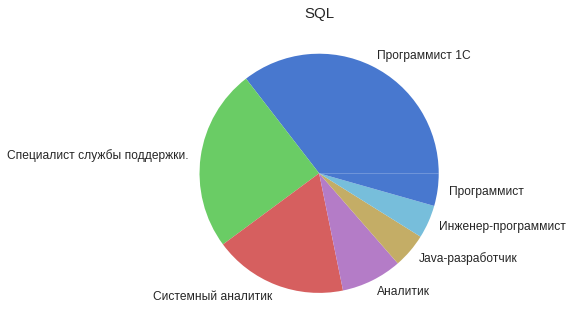

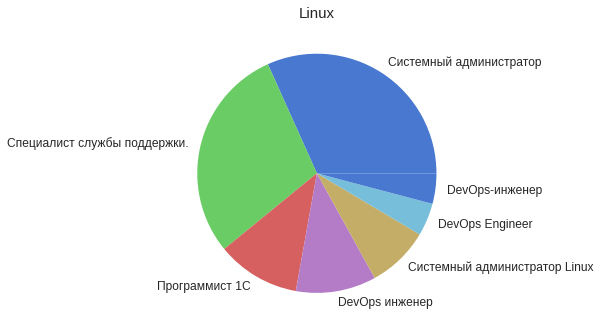

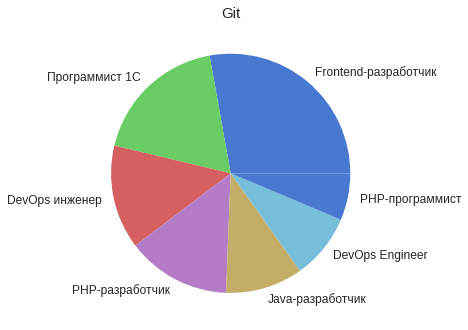

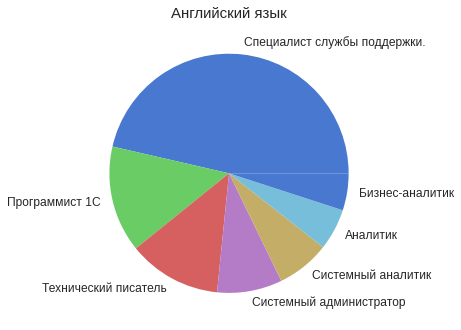

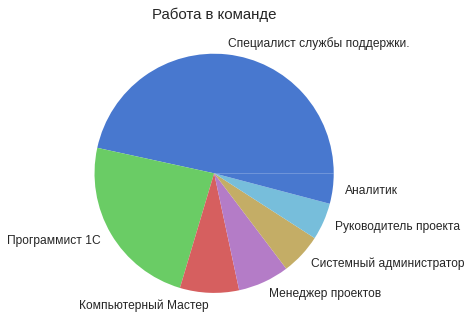

In [ ]:
spec_counts = filter_df_key['key_skills_list'].value_counts()[:5]
spec_counts

spec_types = spec_counts.index
spec_types # создали список с названиями 5ти самых ключевых навыков

import matplotlib.pyplot as plt
for spec_type in spec_types:
  spec_df = filter_df_key[filter_df_key['key_skills_list'] == spec_type]
  vacancy_counts = spec_df['name'].value_counts()
  vacancy_counts = vacancy_counts[:7]
  plt.title(spec_type, fontsize=15)
  plt.pie(vacancy_counts.values, labels =vacancy_counts.index)
  plt.show()

Вывод: по данным диаграммам можем увидеть в какких вакансия больше востребованны данные ключевые навыки

# Статистический анализ данных

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

## 1. Структурирование таблицы.

In [ ]:
df['employer_json'] = df['employer'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['employer_list'] = df['employer_json'].apply(get_values)

In [ ]:
df['schedule_json'] = df['schedule'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['schedule_list'] = df['schedule_json'].apply(get_values)

In [ ]:
df['experience_json'] = df['experience'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['experience_list'] = df['experience_json'].apply(get_values)

In [ ]:
df = df.rename(columns={'convertred_salary_from': 'salary_min', 'convertred_salary_to': 'salary_max'}) 

Таблица для анализа

In [ ]:
df_jobs = df[['name','salary_min','salary_max','employer_list','region','schedule_list','experience_list','key_skills_list']]
df_jobs = df_jobs.rename(columns={'employer_list': 'employer', 'schedule_list':'schedule', 'experience_list':'experience', 'key_skills_list':'key_skills'})
df_jobs = df_jobs.reset_index(drop=True)
df_jobs.head()

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills
0,Младший специалист ручного тестирования,NaN,NaN,Яндекс,Астраханская область,Удаленная работа,Нет опыта,[]
1,Тестировщик.Net,21750.0,43500.0,МФК Саммит,Астраханская область,Полный день,От 1 года до 3 лет,"[Git, SQL, Тестирование, C#, API]"
2,Пентестер,NaN,NaN,SearchInform,Астраханская область,Полный день,От 3 до 6 лет,"[SQL, Linux, Информационная безопасность, Рабо..."
3,Ведущий специалист по информационным технологиям.,22620.0,NaN,Почта России,Астраханская область,Полный день,Нет опыта,"[Пользователь ПК, Работа в команде, 1С: Предпр..."
4,Специалист по защите информации,20000.0,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Астраханская область,Полный день,Нет опыта,"[MS Dos, Диагностика ПК, Компьютер, Работа в у..."


## 2. Определение типов данных.


In [ ]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        50390 non-null  object 
 1   salary_min  20211 non-null  float64
 2   salary_max  11896 non-null  float64
 3   employer    50390 non-null  object 
 4   region      50390 non-null  object 
 5   schedule    50390 non-null  object 
 6   experience  50390 non-null  object 
 7   key_skills  50390 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


Типы данных в stat_df:
 1. name - категориальный тип
 2. salary_ min, salary_max - количественный тип
 3. employer - категориальный тип
 4. region - категориальный тип
 5. shedule - категориальный тип
 6. experience - категориальный тип (можно привести к порядковому) 


## 3. Визуализация данных


### 3.1 Гистограммы

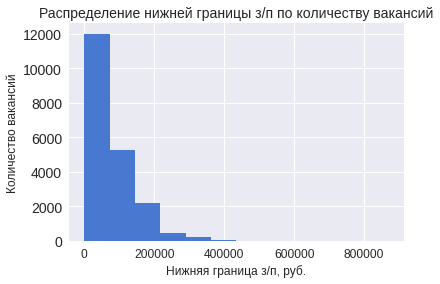

In [ ]:
df['salary_min'].hist(bins=12)
plt.title("Распределение нижней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Нижняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.show()

###3.2 Столбчатые диаграммы

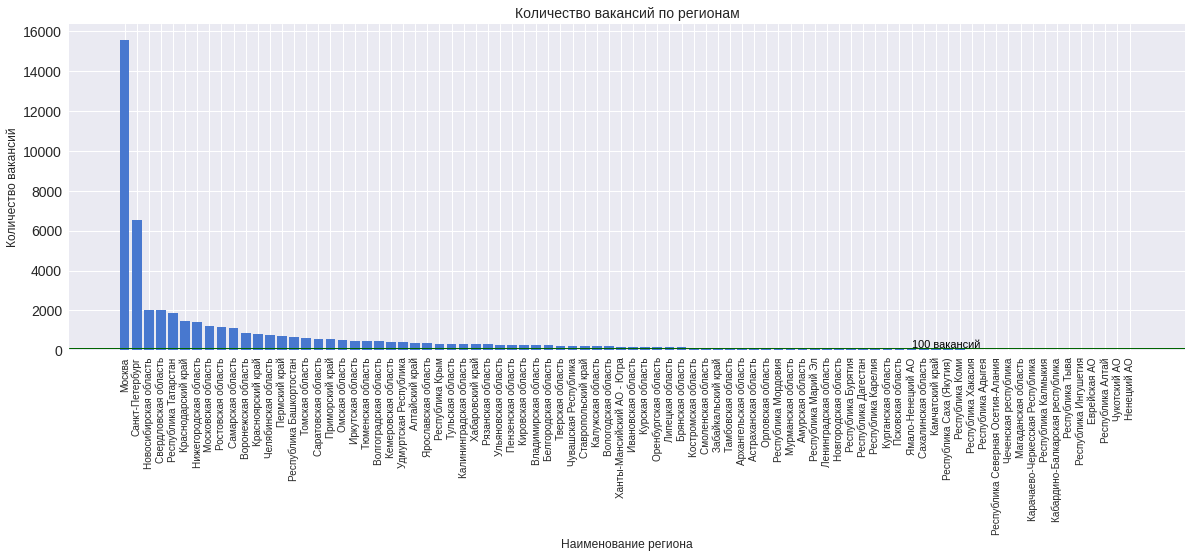

In [ ]:
region_vac_count = df['region'].value_counts()
fig = plt.figure(figsize = (20, 6))
plt.bar( region_vac_count.index, region_vac_count)
 
plt.title(label = "Количество вакансий по регионам", fontsize = 14)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel( "Наименование региона", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.axhline( y=100, color = 'darkgreen', linewidth=1)
plt.text(x=65, y=110,  s='100 вакансий', size=11, color='black')

plt.show()

###3.3 Круговые диаграммы

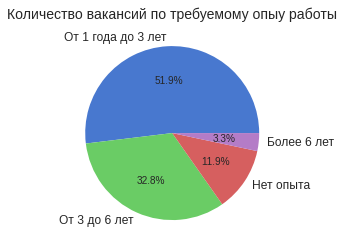

In [ ]:
experience_count = df['experience_list'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "Количество вакансий по требуемому опыу работы", fontsize = 14)
plt.show()

## 4. Гипотеза о виде распределения


> Для количественных показателей проверьте гипотезы о виде распределения.

## Критерий Шапиро-Уилка

> Работает с выборками до 5000 наблюдений

> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05


In [ ]:
stats.shapiro(df_jobs['salary_min'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8285138607025146, pvalue=0.0)

In [ ]:
stats.shapiro(df_jobs['salary_max'].dropna())

ShapiroResult(statistic=0.812499463558197, pvalue=0.0)

Вывод: отвергаем нулевую гипотезу в пользу альтернативыв, мы не можем сказать что наша выборка принадлежит нормальной генеральной совокупности, по количественноым данным Salary min, и Salary max

## Критерий асимметрии и эксцесса

> Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)


> Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)



In [ ]:
df_jobs[['salary_min','salary_max']].skew() # коэффициент асимметрии

salary_min    1.990356
salary_max    2.289777
dtype: float64

In [ ]:
df_jobs[['salary_min','salary_max']].kurtosis() # коэффициент эксцесса

salary_min     6.736627
salary_max    12.670331
dtype: float64

## Тест д'Агостино
> вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino


In [ ]:
stats.normaltest(df_jobs['salary_min'].dropna())

NormaltestResult(statistic=8681.636444132242, pvalue=0.0)

In [ ]:
stats.normaltest(df_jobs['salary_max'])

NormaltestResult(statistic=nan, pvalue=nan)

Все 3 метода показали нам, что у нас достаточно основания для отклонения гипотезы H0.

## 5. Оценка связи между показателями

> В зависимости от типов данных, оцените связь между показателями. Используйте:

*   Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными.
*   Анализ таблиц сопряженности для оценки связи двух категориальных признаков.
*   Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

### 5.1. Критерии сравнения групп 

### ***Проверим гипотезу H0: График работы не влияет на нижнюю границу заработной платы.*** 

>Следовательно альтернативная гипотеза H1 будет звучать как: График работы влияет на нижнюю границу заработной платы.

>Уровень значимости полагаем равным 0,05.

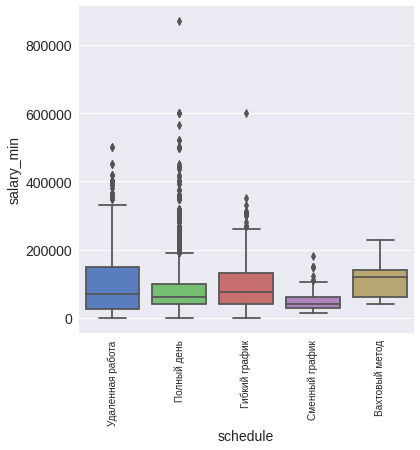

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data=df_jobs)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [ ]:
df_jobs.loc[(df_jobs['salary_min'] > 800000) & (df_jobs['schedule'] == 'Полный день')]

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills
33820,Технический директор,870000.0,NaN,Alpha Personnel,Санкт-Петербург,Полный день,Более 6 лет,[]


In [ ]:
df_jobs=df_jobs.drop(df_jobs.index[[33820]])

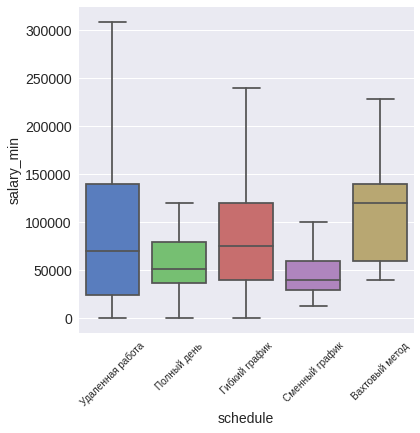

In [ ]:
df1 = df_jobs.drop(df_jobs.loc[(df_jobs['schedule'] == 'Полный день') & (df_jobs['salary_min'] > 120_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Удаленная работа') & (df1['salary_min'] > 310_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Гибкий график') & (df1['salary_min'] > 245_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Сменный график') & (df1['salary_min'] > 100_000)].index)

f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data = df1)
plt.xticks(fontsize = 10, rotation = 45) # поворот подписи на 90 градусов
plt.show()

In [ ]:
dfd1=np.array(df_jobs[df_jobs['schedule']=='Сменный график']['salary_min'])
dfd2=np.array(df_jobs[df_jobs['schedule']=='Полный день']['salary_min'])
dfd3=np.array(df_jobs[df_jobs['schedule']=='Гибкий график']['salary_min'])
dfd4=np.array(df_jobs[df_jobs['schedule']=='Удаленная работа']['salary_min'])
dfd5=np.array(df_jobs[df_jobs['schedule']=='Вахтовый метод']['salary_min'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5)

KruskalResult(statistic=267.0596677876404, pvalue=1.3726144811928616e-56)

Показатель p-value меньше чем 0.5, следовательно у нас достаточно основания для отклонения гипотезы H0. Принимаем гипотезу H1: График работы влияет на нижнюю границу заработной платы.

### 5.2 Анализ сопряженности двух категориальных признаков. 


Оценим статистическую значимость различий двух относительных показателей: опыт работы и график работы.
Гипотеза H0: опыт работы не влияет на график работы.

In [ ]:
wd=pd.crosstab(df_jobs['experience'],df_jobs['schedule']); wd

schedule,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
experience,,,,,
Более 6 лет,9,62,1326,1,276
Нет опыта,2,295,3598,331,1783
От 1 года до 3 лет,48,1075,19932,512,4594
От 3 до 6 лет,65,625,12212,72,3571


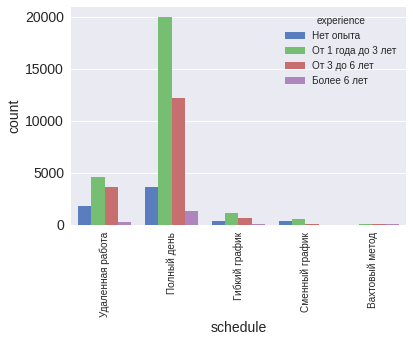

In [ ]:
sns.countplot(x=df_jobs['schedule'], hue=df_jobs['experience'])
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [ ]:
chi2, prob, sdf, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, sdf, prob))

test Statistics: 1272.692226368342
degrees of freedom: 12
p-value: 3.811541481136244e-265



Мы видим, что p-value меньше нашего уровня значимости. Следовательно, мы должны отклонить нулевую и принять альтернативную гипотезу о том, что опыт работы влияет на график работы. Но на графике мы видим, что больше всего вакансий на полный день. То есть сам опыт работы не влияет на график работы.

### 5.3 Корреляционный анализ Пирсона или Спирмена

Приведем колонку с опытом к порядковым переменным.

In [ ]:
df_jobs['experience'].unique()

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

In [ ]:
def exp(row):
  if row == 'Нет опыта':
    return '0'
  if row == 'От 1 года до 3 лет':
    return '1'
  if row == 'От 3 до 6 лет':
    return '2'
  if row == 'Более 6 лет':
    return '3'

df_jobs['experience_p'] = df_jobs['experience'].apply(exp).astype(np.int32)

df_jobs

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p
0,Младший специалист ручного тестирования,NaN,NaN,Яндекс,Астраханская область,Удаленная работа,Нет опыта,[],0
1,Тестировщик.Net,21750.0,43500.0,МФК Саммит,Астраханская область,Полный день,От 1 года до 3 лет,"[Git, SQL, Тестирование, C#, API]",1
2,Пентестер,NaN,NaN,SearchInform,Астраханская область,Полный день,От 3 до 6 лет,"[SQL, Linux, Информационная безопасность, Рабо...",2
3,Ведущий специалист по информационным технологиям.,22620.0,NaN,Почта России,Астраханская область,Полный день,Нет опыта,"[Пользователь ПК, Работа в команде, 1С: Предпр...",0
...,...,...,...,...,...,...,...,...,...
50386,Программист 1С,130000.0,NaN,Окраина,Тульская область,Полный день,От 1 года до 3 лет,"[1С: Управление Торговлей, 1С: Предприятие 8, ...",1
50387,Начальник отдела информационных технологий,50000.0,NaN,ГУЗ ГБ № 3 Г.Тулы,Тульская область,Полный день,От 1 года до 3 лет,"[Организаторские навыки, Работа в команде, Упр...",1
50388,"Технический директор (DevOps, технолог)",85000.0,NaN,ИнтерЛабс,Тульская область,Полный день,От 3 до 6 лет,[],2
50389,Начальник отдела по защите информации и информ...,NaN,NaN,"ТИТАН-2, холдинг",Тульская область,Полный день,Более 6 лет,"[Информационная безопасность, Аудит безопаснос...",3


Чтобы провести анализ с помощью критерия, нам надо чтобы пропусков в данных не было. Чтобы избавится от пропусков в колонке зарплаты, мы заменим пустые значения медианой.

In [ ]:
df_jobs.loc[df_jobs['salary_min'].isna(), 'salary_min'] = df_jobs['salary_min'].median()
df_jobs.loc[df_jobs['salary_max'].isna(), 'salary_max'] = df_jobs['salary_max'].median()

In [ ]:
df_jobs['salary_min']

0         60000.0
1         21750.0
2         60000.0
3         22620.0
           ...   
50386    130000.0
50387     50000.0
50388     85000.0
50389     60000.0
Name: salary_min, Length: 50389, dtype: float64

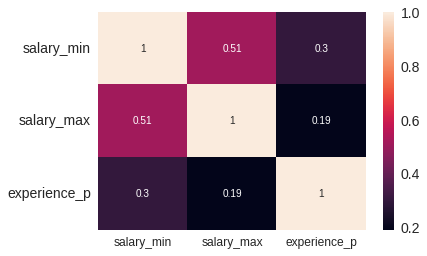

In [ ]:
num = ['salary_min','salary_max','experience_p']
hm = sns.heatmap(df_jobs[num].corr(),annot=True)

In [ ]:
scipy.stats.pearsonr(df_jobs.salary_min, df_jobs.salary_max)

(0.5142687067386797, 0.0)

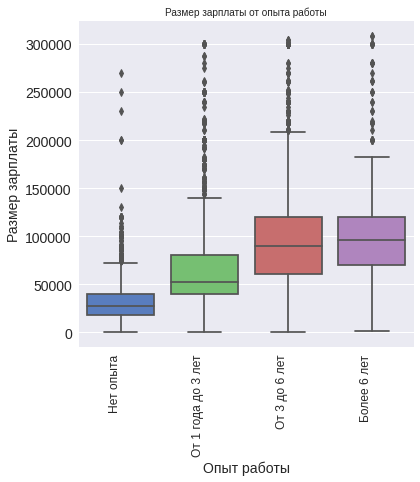

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience', y='salary_min', data=df1)
plt.xticks(rotation=90, ha='right')
plt.title('Размер зарплаты от опыта работы')
plt.xlabel('Опыт работы')
plt.ylabel('Размер зарплаты')
plt.show()

Естественно, видим, что минимальная и максимальная зарплата связаны. А так же, зарплата связана с опытом работы, так как значение p-value близко к нулю, значит мы надежно отвергаем гипотезу об отсутствии связи.

## 6. Формулирование гипотезы.

### **Гипотеза Н0:** Владение навыками SQL не влияет на уровень зарплаты Аналитиков.

In [ ]:
name_analyst = df_jobs.loc[df_jobs['name'] == 'Аналитик']
name_analyst['key_skills'][:5]

147    [Пользователь ПК, MS Excel, 1С: Торговля и склад]
447    [MS PowerPoint, Мониторинг СМИ, Социальные сет...
457    [Работа с базами данных, Работа в команде, Раб...
460    [Работа в команде, Грамотная речь, Анализ рынк...
981    [Работа в команде, Аналитические исследования,...
Name: key_skills, dtype: object

In [ ]:
def sql_key(row):
  if 'SQL' in row:
    return 1
  return 0

name_analyst['sql'] = name_analyst['key_skills'].apply(sql_key)
name_analyst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p,sql
147,Аналитик,60000.0,90000.0,Sumitec International,Хабаровский край,Полный день,От 1 года до 3 лет,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",1,0
447,Аналитик,60000.0,90000.0,Диалог Регионы,Рязанская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",1,0
457,Аналитик,65000.0,85000.0,Граськова Ирина,Рязанская область,Полный день,От 1 года до 3 лет,"[Работа с базами данных, Работа в команде, Раб...",1,0
460,Аналитик,39150.0,90000.0,"Грейн Холдинг, Управляющая компания",Рязанская область,Полный день,От 1 года до 3 лет,"[Работа в команде, Грамотная речь, Анализ рынк...",1,0
...,...,...,...,...,...,...,...,...,...,...
49691,Аналитик,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Кемеровская область,Удаленная работа,От 1 года до 3 лет,"[Работа с большим объемом информации, MS Power...",1,0
49702,Аналитик,40000.0,90000.0,СГМК-Трейд,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",1,1
49710,Аналитик,60000.0,90000.0,ЕВРАЗ,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Проведение презентаций, Делова...",1,0
50103,Аналитик,26100.0,90000.0,Центр опережающей профессиональной подготовки ...,Тульская область,Полный день,Нет опыта,[],0,0


In [ ]:
name_analyst.groupby('sql')['salary_min'].mean()

sql
0    55327.795097
1    68153.023256
Name: salary_min, dtype: float64

In [ ]:
m = name_analyst.groupby('sql')['salary_min'].mean()

In [ ]:
n0 = name_analyst[name_analyst['sql'] == 0]
n1 = name_analyst[name_analyst['sql'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])


MannwhitneyuResult(statistic=7812.0, pvalue=2.7767640890806662e-06)

**Итак,** p-value меньше нашего уровня значимости, значит знание SQL влияет на уровень зарплаты.

In [ ]:
def python_key(row):
  if 'Python' in row:
    return 1
  return 0

name_analyst['python'] = name_analyst['key_skills'].apply(python_key)
name_analyst

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p,sql,python
147,Аналитик,60000.0,90000.0,Sumitec International,Хабаровский край,Полный день,От 1 года до 3 лет,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",1,0,0
447,Аналитик,60000.0,90000.0,Диалог Регионы,Рязанская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",1,0,0
457,Аналитик,65000.0,85000.0,Граськова Ирина,Рязанская область,Полный день,От 1 года до 3 лет,"[Работа с базами данных, Работа в команде, Раб...",1,0,0
460,Аналитик,39150.0,90000.0,"Грейн Холдинг, Управляющая компания",Рязанская область,Полный день,От 1 года до 3 лет,"[Работа в команде, Грамотная речь, Анализ рынк...",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49691,Аналитик,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Кемеровская область,Удаленная работа,От 1 года до 3 лет,"[Работа с большим объемом информации, MS Power...",1,0,0
49702,Аналитик,40000.0,90000.0,СГМК-Трейд,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",1,1,0
49710,Аналитик,60000.0,90000.0,ЕВРАЗ,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Проведение презентаций, Делова...",1,0,0
50103,Аналитик,26100.0,90000.0,Центр опережающей профессиональной подготовки ...,Тульская область,Полный день,Нет опыта,[],0,0,0


In [ ]:
name_analyst.groupby('python')['salary_min'].mean()

python
0    58129.032618
1    63596.153846
Name: salary_min, dtype: float64

In [ ]:
n0 = name_analyst[name_analyst['python'] == 0]
n1 = name_analyst[name_analyst['python'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])

MannwhitneyuResult(statistic=3345.0, pvalue=0.06608927569679994)

**Итак,** p-value больше нашего уровня значимости, значит делаем вывод, что знание Pythona не влияет на уровень зарплаты.

# Вывод

Итак,
* график работы влияет на уровень зарплаты. Самая высокооплачиваемая работа с удаленным графиком работы, следущее по значимости - вахтовый метод.
* из графика видно, что больше всего вакансий на полный рабочий день.
* опыт работы влияет на уровень зарплаты, чем больше опыт, тем больше зарплата.
* для аналитиков знание SQL увеличивает уровень зарплаты, а вот знание Python не влияет на уровень дохода.

In [ ]:
from google.colab import files

df_jobs.to_csv('df_jobs.csv')
files.download('df_jobs.csv')

In [ ]:
#df_jobs2 = df_jobs.loc[df_jobs['name'].value_counts().head(1000)]
#df_jobs2

In [ ]:
#from google.colab import files

#df_jobs2.to_csv('df_jobs2.csv', index=False)
#files.download('df_jobs2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>